# Assignment 1 - Data Collection & Preparation

In [1]:
import pandas as pd
import urllib.request
import csv
from datetime import datetime

## Task 1: Identify APIs

The objective of this assignment is to collect a dataset from one or more open web API's, and then use Python to process and analyse this data. 

I decided to use an API on world energy data from British Petroleum's database provided by www.quandl.com. Specifically, from https://www.quandl.com/data/BP-British-Petroleum.

The API Key I received is H1Y8rrdvt2nCUzoNJXLP. Authenticated users have a limit of 300 calls per 10 seconds, 2,000 calls per 10 minutes and a limit of 50,000 calls per day. This was more than enough for my use.

In [2]:
api_key = "H1Y8rrdvt2nCUzoNJXLP"

## Task 2: Collect the data from the chosen APIs using Python

In order to collect the data from the chosen APIs I created 3 seperate functions. 

1. The first function 'create_file' creates a csv file, given a file location and headings for the csv.

2. The second function 'get_and_write_data' gets the data from the api, converts it to a list and writes this to the csv file.

3. The third function 'individual_energy_data' uses the second function to pull the data from the api, depending on the type, start year and end year for the desired data.

These functions can be seen below, and are commented for further insight.

In [3]:
# Create a file in location 'file_loc' with headings.
def create_file(file_loc, headings):
    with open(file_loc, "w", newline='') as write_file:  # open will create a new file if one doesnt exist in that location
        f = csv.writer(write_file)                       # the file is opened for write mode
        f.writerow(headings)                             # headings are written to the file
    write_file.close()

# This function gets data from the URL and writes it to the existing csv
def get_and_write_data(url, file_loc):
    try:                                               # try except, incase the url cannot be found
        response = urllib.request.urlopen(url)
        html = response.read().decode()                # decode the response from the url
        # print(html)
    except:
        print("Failed to retrieve %s" % url)

    with open(file_loc, "a", newline='') as write_file: # open file to append ("a") it
        f = csv.writer(write_file)                      # writes to the file
        lines = html.strip().split("\n")                # stip the lines and split them by new lines
        # print(lines)
        for l in lines:                                 # loop goes through each line, splits them by commas
            l = l.split(",")                            # each split is written to a new row.
            f.writerow(l)
    write_file.close()

# get the data from the api using the start and end date and the energy type
# This function will use the get_and_write_data function from above
def individual_energy_data(file_loc, api_key, start_year, end_year, type):
    if end_year>2015:
        end_year = 2015                            # The data online only goes between the year range 1965 to 2015
    if start_year<1965:
        start_year = 1965                          
    
    api_key = str(api_key)                         # I convert all of these values to string so they can be added to the URL
    start_year = str(start_year)
    end_year = str(end_year)
    type.lower()                                   # Type is converted to lowercase for comparison

    if type == "hydroelectric":
        type = "HYDRO_CONSUM_WRLD"
    elif type == "geothermal":
        type = "GEO_CONSUM_WRLD"
    elif type == "solar":
        type = "SOLAR_CONSUM_WRLD"
    elif type == "wind":
        type = "WIND_CONSUM_WRLD"
    elif type == "total":                           # Added for further comparisons
        type = "PRIMARY_CONSUM_O_WRLD"               
    print(type + " retreived from API")

    link = "https://www.quandl.com/api/v3/datasets/BP/"+ \
           type+".csv?"+\
           "start_date="+start_year+"-12-31"+"&"\
           "end_date="+end_year+"-12-31"+"&"+\
           "api_key="+api_key
    # print(link)

    get_and_write_data(link, file_loc)            # once the URL is created, this function will then add the csv data to the csv
                                                  # file

## Task 3: Parse the collected data, and store it in an appropriate file format (CSV)

I decided to use 4 different datasets from the API. These included annual Wind, Geothermal, Hydroelectric and Solar energy 
consumption for the total world. I created 4 seperate pandas dataframes for each of these datasets.

In [4]:
# Create files and store the data
wind_file = "wind-data.csv"
create_file(wind_file, " ")
individual_energy_data(wind_file, api_key, 1995, 2015, "wind")
dfw  = pd.read_csv(wind_file)
dfw.columns = ['Date','Wind']

geothermal_file = "geothermal-data.csv"
create_file(geothermal_file, " ")
individual_energy_data(geothermal_file, api_key, 1995, 2015, "geothermal")
dfg = pd.read_csv(geothermal_file)
dfg.columns = ['Date','Geothermal']

hydro_file = "hydro-data.csv"
create_file(hydro_file, " ")
individual_energy_data(hydro_file, api_key, 1995, 2015, "hydroelectric")
dfh = pd.read_csv(hydro_file)
dfh.columns = ['Date','Hydroelectric']

solar_file = "solar-data.csv"
create_file(solar_file, " ")
individual_energy_data(solar_file, api_key, 1995, 2015, "solar")
dfs = pd.read_csv(solar_file)
dfs.columns = ['Date','Solar']

WIND_CONSUM_WRLD retreived from API
GEO_CONSUM_WRLD retreived from API
HYDRO_CONSUM_WRLD retreived from API
SOLAR_CONSUM_WRLD retreived from API


## Task 4: Load and represent the data as a Pandas DataFrame. Apply pre-processing steps to clean/filter/combine the data.

I then gathered the data into one dataframe and applied some pre-processing.
 - I changed the index of the dataframe to be indexed by year. 
 - Checking the units of the BP datasets, I verified that the datasets had the same units and rounded to two decimal places.
 - I searched the DataFrame for missing values and found this to be nil.

In [5]:
# Saving each of the values from the 4 dataframes to a singular dataframe
columns = ["Date","Wind","Geothermal","Hydroelectric","Solar"]
df = pd.DataFrame(columns=columns)
df['Date']=dfw['Date'].values
df['Wind']=dfw['Wind'].values
df['Geothermal']=dfg['Geothermal'].values
df['Hydroelectric']=dfh['Hydroelectric'].values
df['Solar']=dfs['Solar'].values

# Changing dates to display years
datetimes = []
for date in df['Date']:
    datetimes.append(datetime.strptime(date, '%Y-%m-%d'))
df['Date'] = datetimes
df['Date']=df['Date'].dt.year
df.rename(columns={'Date':'Year'}, inplace=True)
df.set_index('Year', inplace=True)

df = df.round(2)

df

,Wind,Geothermal,Hydroelectric,Solar
Year,,,,
2015,841.23,518.20,3946.25,253.04
2014,716.45,491.98,3908.02,190.77
2013,643.67,456.16,3822.00,142.59
2012,526.49,425.41,3692.74,101.92
2011,435.94,400.12,3515.78,63.84
2010,341.53,376.11,3465.91,33.33
2009,277.71,339.24,3261.01,20.50
2008,219.12,316.34,3276.53,12.22
2007,170.94,298.20,3092.30,7.39


In [6]:
# Checking for missing data
print(df.isnull().sum())

Wind             0
Geothermal       0
Hydroelectric    0
Solar            0
dtype: int64


In [7]:
df.dtypes.value_counts()

float64    4
dtype: int64

There is no null data in the DataFrame.

## Task 5: Analyse and summarise the cleaned dataset

Using this newly created Pandas DataFrame I had a few different things I wanted to check. Firstly I thought it would be interesting to look at the individual growth of these renewable energy sources over the past 20 years or so. I decided to then start in 1995 in order to display the point where the renewable sources took off.

### <font color='green'>**_Individual renewable growth_**</font>

Starting by plotting the Solar energy alone, I could see the huge growth begin around the year 2010 or so.

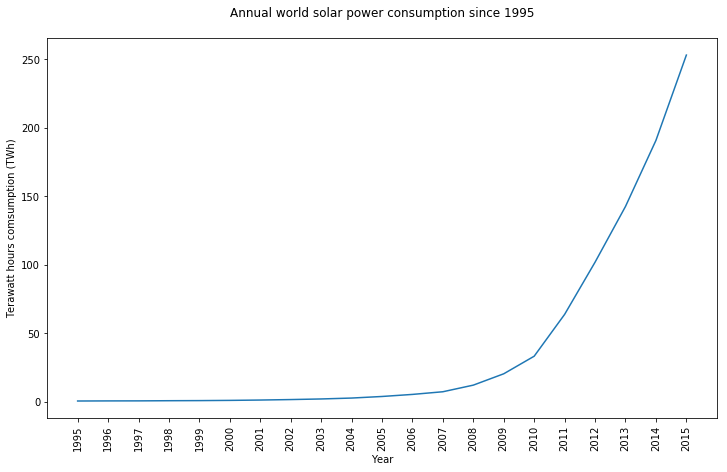

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Individual data plot for solar data
plt.figure()
df['Solar'].plot(figsize=(12,7))
plt.title("Annual world solar power consumption since 1995\n")
plt.ylabel("Terawatt hours comsumption (TWh)")
plt.xlabel("Year")
plt.xticks(df.index, rotation=90)
plt.show()

It can be seen from this dataset that the Solar power consumption has increased exponentially over the past 20 years. An increadible growth. I then was interested to see how the other renewable energies compared to this.

I decided to create subplots to graph the 4 energy types side by side. I decided not to standardise the y-axes, since the consumption of some energy types were much smaller others. I kept this in mind when analysing the graphs.

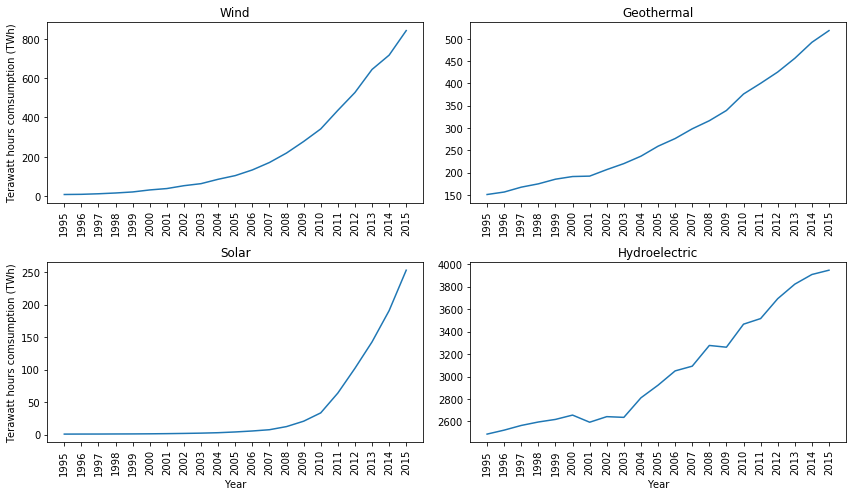

In [9]:
# Creating 2x2 graphs of wind, geo, hydro, and solar
plt.figure()
plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,7))
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Wind'])
plt.title('Wind')
plt.xticks(df.index, rotation=90)
plt.ylabel("Terawatt hours comsumption (TWh)")

plt.subplot(2, 2, 2)
plt.plot(df.index, df['Geothermal'])
plt.title('Geothermal')
plt.xticks(df.index, rotation=90)

plt.subplot(2, 2, 3)
plt.plot(df.index, df['Solar'])
plt.xlabel("Year")
plt.title('Solar')
plt.xticks(df.index, rotation=90)
plt.ylabel("Terawatt hours comsumption (TWh)")

plt.subplot(2, 2, 4)
plt.plot(df.index, df['Hydroelectric'])
plt.xlabel("Year")
plt.title('Hydroelectric')
plt.xticks(df.index, rotation=90)

plt.tight_layout()
plt.show()

From these graphs it can be seen then that the sharpest growth is in the Solar and Wind energies. These energy types have grown from near zero in 2010 to 800 TWh and 250 TWh in 2015.

Clearly the y-axis ticks are in different increments, so the overall increase in some energy types is greater than others. Hydroelectric energy has increased by approximately 1500 TWh consumption in the past 20 years. By far the largest growth, however it is the longest renewable type in the industry, enabling it to grow without as many barriers as Wind and Solar which are still quite experimental.

### <font color='green'>**_Total world renewable consumption_**</font>

My biggest interest with this study was to view the total growth of renewables in the past 20 years or so. To do this I created a stacked bar chart. This type of graph is not optimal for comparison of renewable types, however it is good for viewing the total growth of the renewable industry.

I created this stacked bar chart initially with matplotlib.

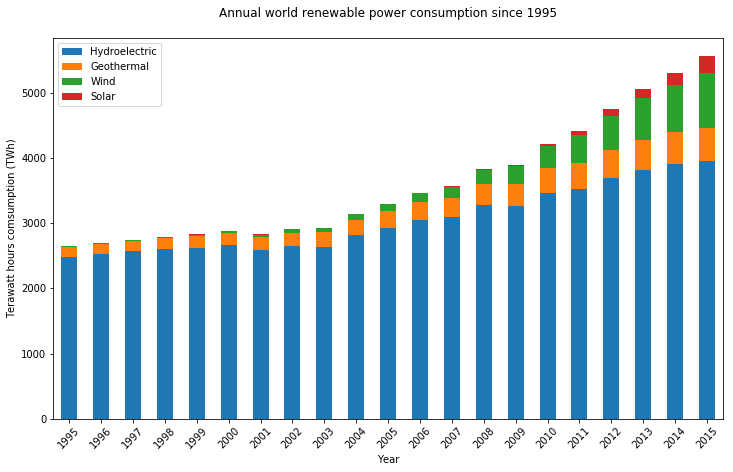

In [10]:
# Stacked graph matplotlib
df[['Hydroelectric','Geothermal','Wind','Solar']].plot(kind='bar', stacked=True, figsize=(12,7))
plt.title("Annual world renewable power consumption since 1995\n")
plt.ylabel("Terawatt hours comsumption (TWh)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.show()

I then decided I would like this graph to be interactive to view the exact components of each renewable type in each stack. To do this I used plotly.

In [11]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Stacked barchart plotly
Wind = go.Bar(
    y=df['Wind'],
    x=df.index,
    name='Wind'
)
Geothermal = go.Bar(
    y=df['Geothermal'],
    x=df.index,
    name='Geothermal'
)
Hydroelectric = go.Bar(
    y=df['Hydroelectric'],
    x=df.index,
    name='Hydroelectric'
)
Solar = go.Bar(
    y=df['Solar'],
    x=df.index,
    name='Solar'
)

data = [Hydroelectric, Geothermal, Wind, Solar]
layout = go.Layout(
    barmode='stack',
    title="Annual world renewable power consumption since 1995",
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Terawatt hours comsumption (TWh)',
    )

)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

This data shows the increase that renewable energy consumption has had over the past 20 years. This growth is set to continue as countries are still investing heavily in renewables, not limited to these 4 energy types. Investments in renewable energy sources in 2016 were recorded to be approximately $297 billion worldwide. More than double the investment in fossil fuels (1).

(1) - (http://www.ifc.org/wps/wcm/connect/974eedcb-f3d9-4806-b32e-73720e6f4ca7/IFC-Climate_Investment_Opportunity_Creating_Markets.pdf?MOD=AJPERES)

### <font color='green'>**_Annual differential growth (Growth relative to the previous year)_**</font>

So far, in creating 4 individual adjacent subplots of each energy type, and graphing a stacked bar chart I have found it is not very clear as to which individual renewable seems to have the greatest growth. To view this more clearly I decided to graph the increase in the energy type since 1995.

To do this I need to create a new Pandas DataFrame containing values of increase or decrease in each per year.

In [12]:
# further pre-processing by reversing data
df2 = df.copy(deep=True)
df2 = df2.iloc[::-1]
df2

# loop through each year replacing the data by the value minus the value of the year previous
for year in df2.index[1:]:
    df2['Wind'][year] = df['Wind'][year] - df['Wind'][year-1]
    df2['Geothermal'][year] = df['Geothermal'][year] - df['Geothermal'][year-1]
    df2['Hydroelectric'][year] = df['Hydroelectric'][year] - df['Hydroelectric'][year-1]
    df2['Solar'][year] = df['Solar'][year] - df['Solar'][year-1]
    
# setting the first year to 0 as the reference year
for column in df2:
    df2[column][1995] = 0
    
df2

,Wind,Geothermal,Hydroelectric,Solar
Year,,,,
1995,0.00,0.00,0.00,0.00
1996,0.92,5.54,35.42,0.07
1997,2.82,10.93,41.62,0.03
1998,3.94,7.40,30.70,0.11
1999,5.32,10.43,23.01,0.08
2000,10.22,5.96,38.45,0.16
2001,7.05,0.93,-63.43,0.25
2002,14.49,14.59,49.58,0.35
2003,10.43,13.45,-6.42,0.44


In [13]:
# Replace all negative values as zero growth for the stacked bar chart, saving the original values in df3
df3 = df2.copy(deep=True)

df2[df2 < 0] = 0

df2

,Wind,Geothermal,Hydroelectric,Solar
Year,,,,
1995,0.00,0.00,0.00,0.00
1996,0.92,5.54,35.42,0.07
1997,2.82,10.93,41.62,0.03
1998,3.94,7.40,30.70,0.11
1999,5.32,10.43,23.01,0.08
2000,10.22,5.96,38.45,0.16
2001,7.05,0.93,0.00,0.25
2002,14.49,14.59,49.58,0.35
2003,10.43,13.45,0.00,0.44


In [14]:
# Stacked barchart representing annual growth from relative to the previous year
Wind = go.Bar(
    y=df2['Wind'],
    x=df2.index,
    name='Wind'
)
Geothermal = go.Bar(
    y=df2['Geothermal'],
    x=df2.index,
    name='Geothermal'
)
Hydroelectric = go.Bar(
    y=df2['Hydroelectric'],
    x=df2.index,
    name='Hydroelectric'
)
Solar = go.Bar(
    y=df2['Solar'],
    x=df2.index,
    name='Solar'
)

data = [Hydroelectric, Geothermal, Wind, Solar]
layout = go.Layout(
    barmode='stack',
    title="Annual growth in renewable power consumption since 1995",
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Growth in consumption from previous year in terawatt hours (TWh)',
    )

)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar-growth')

Again it is not very clear here which energy type has the greatest growth over the years. with some time, it is just about visable that wind energy seems to be growing at a faster and more consistent rate.

I decided it would probably be better to plot the 4 types side by side in subplots once again.

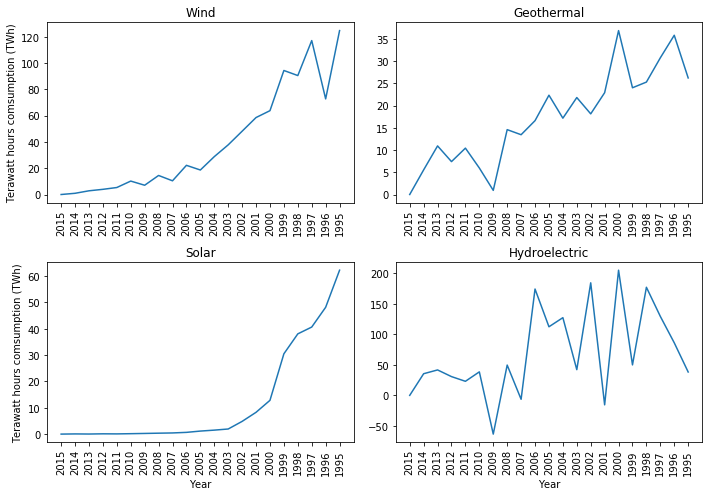

In [15]:
plt.figure()
plt.subplots(2,2,sharex=True,sharey=True,figsize=(10,7))
plt.subplot(2, 2, 1)
plt.plot(df.index, df3['Wind'])
plt.title('Wind')
plt.xticks(df.index, rotation=90)
plt.ylabel("Terawatt hours comsumption (TWh)")
plt.gca().invert_xaxis()

plt.subplot(2, 2, 2)
plt.plot(df.index, df3['Geothermal'])
plt.title('Geothermal')
plt.xticks(df.index, rotation=90)
plt.gca().invert_xaxis()

plt.subplot(2, 2, 3)
plt.plot(df.index, df3['Solar'])
plt.xlabel("Year")
plt.title('Solar')
plt.xticks(df.index, rotation=90)
plt.ylabel("Terawatt hours comsumption (TWh)")
plt.gca().invert_xaxis()

plt.subplot(2, 2, 4)
plt.plot(df.index, df3['Hydroelectric'])
plt.xlabel("Year")
plt.title('Hydroelectric')
plt.xticks(df.index, rotation=90)
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

Here it can be seen that although the growth chunks by year are not as great as that of Hydroelectric which seems to grow by up to 200 TWh per year, wind and solar energy seem to have the most steady growth year on year.

If growth continues at these rates with wind and solar, they will have as significant an impact as Hydroelectric worldwide.

### <font color='green'>**_Percentage of total energy consumption_**</font>

All of this growth seems impressive considering the global energy crisis, however I would like to see what percentage of the total energy consumption is represented by these renewable energy types. To do this I adjusted my individual_energy_data function, the type "total" which returns the total energy data in tonnes of oil equivalent for the entire world.

(One million tonnes of oil is equivalent to 11.63 TWh of energy)

I next create a new row in the original df DataFrame which will store the total energy values for the world.

In [16]:
# Create files and store the data
total_energy_file = "total-energy-data.csv"
create_file(total_energy_file, " ")
individual_energy_data(total_energy_file, api_key, 1995, 2015, "total")
df_total_energy  = pd.read_csv(total_energy_file)
df_total_energy.columns = ['Date','Total Energy']

# converting to TWh
df_total_energy["Total Energy"] = df_total_energy["Total Energy"]*11.63

# Rounding to 2 decimal places to match format of data in the datframe
df['Total Energy'] = df_total_energy['Total Energy'].values.round(2)

df['Total Renewables'] = df['Wind'].values + df['Geothermal'].values + df['Solar'].values + df['Hydroelectric'].values

df

PRIMARY_CONSUM_O_WRLD retreived from API


,Wind,Geothermal,Hydroelectric,Solar,Total Energy,Total Renewables
Year,,,,,,
2015,841.23,518.20,3946.25,253.04,152903.58,5558.72
2014,716.45,491.98,3908.02,190.77,151429.50,5307.22
2013,643.67,456.16,3822.00,142.59,149714.65,5064.42
2012,526.49,425.41,3692.74,101.92,146794.96,4746.56
2011,435.94,400.12,3515.78,63.84,144798.45,4415.68
2010,341.53,376.11,3465.91,33.33,141669.12,4216.88
2009,277.71,339.24,3261.01,20.50,134890.43,3898.46
2008,219.12,316.34,3276.53,12.22,137010.99,3824.21
2007,170.94,298.20,3092.30,7.39,135109.50,3568.83


Now plotting the renewables over the total energy in a stacked bar chart using plotly.

In [17]:
# Stacked barchart representing renewables over the total energy consumption
Total_Energy = go.Bar(
    y=df['Total Energy'],
    x=df.index,
    name='Total Energy'
)
Renewable_Energy = go.Bar(
    y=df['Total Renewables'],
    x=df.index,
    name='Renewable Energy'
)

data = [Total_Energy, Renewable_Energy]
layout = go.Layout(
    barmode='stack',
    title="Renewable Energy and the Total energy since 1995",
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Terawatt hours of consumption(TWh)',
    )

)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar-percentage-renewables')

From this plot it appears that the total renewable energy consumption has grown in the same proportion as the total energy consumption. 

As a final graph, I plot the percentage of total energy which is represented by renewables.

In [18]:
df["Percentage Renewables"] = (df["Total Renewables"].values/df["Total Energy"].values)*100

df

,Wind,Geothermal,Hydroelectric,Solar,Total Energy,Total Renewables,Percentage Renewables
Year,,,,,,,
2015,841.23,518.20,3946.25,253.04,152903.58,5558.72,3.635441
2014,716.45,491.98,3908.02,190.77,151429.50,5307.22,3.504746
2013,643.67,456.16,3822.00,142.59,149714.65,5064.42,3.382715
2012,526.49,425.41,3692.74,101.92,146794.96,4746.56,3.233463
2011,435.94,400.12,3515.78,63.84,144798.45,4415.68,3.049535
2010,341.53,376.11,3465.91,33.33,141669.12,4216.88,2.976570
2009,277.71,339.24,3261.01,20.50,134890.43,3898.46,2.890094
2008,219.12,316.34,3276.53,12.22,137010.99,3824.21,2.791170
2007,170.94,298.20,3092.30,7.39,135109.50,3568.83,2.641435


In [19]:
# Stacked barchart representing renewables over the total energy consumption
Percentage_Renewables = go.Bar(
    y=df['Percentage Renewables'],
    x=df.index,
    name='Percentage Renewables'
)

data = [Percentage_Renewables]
layout = go.Layout(
    title="Percentage of world energy consumption which comprises of renewable types (%)",
    xaxis=dict(
        title='Year',
    ),
    yaxis=dict(
        title='Percentage (%)',
    )

)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='renewables')

Observing this graph, I see that although there has been huge growth in renewable energy over the past few years, the percentage growth in the total energy consumption is nearly similar (slightly less). 

There has been some growth in the percentage of renewable consumption past 15 years, however 1% growth from 2.5% in 2003 to 3.5% in 2015 is not a huge leap, considering the current environmental demands of zero-emission energy types.